In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score
  
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 
  
print(covertype.variables) 

                                  name     role     type demographic  \
0                            Elevation  Feature  Integer        None   
1                               Aspect  Feature  Integer        None   
2                                Slope  Feature  Integer        None   
3     Horizontal_Distance_To_Hydrology  Feature  Integer        None   
4       Vertical_Distance_To_Hydrology  Feature  Integer        None   
5      Horizontal_Distance_To_Roadways  Feature  Integer        None   
6                        Hillshade_9am  Feature  Integer        None   
7                       Hillshade_Noon  Feature  Integer        None   
8                        Hillshade_3pm  Feature  Integer        None   
9   Horizontal_Distance_To_Fire_Points  Feature  Integer        None   
10                    Wilderness_Area1  Feature  Integer        None   
11                          Soil_Type1  Feature  Integer        None   
12                          Soil_Type2  Feature  Integer        

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

print("LDA")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Macro Recall:", recall_score(y_test, y_pred_lda, average='macro'))
print("Macro F1 Score:", f1_score(y_test, y_pred_lda, average='macro'))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_lda))
print("Classification Report:", classification_report(y_test, y_pred_lda))

#QDA 
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

print("QDA Results")
print("Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Macro Recall:", recall_score(y_test, y_pred_qda, average='macro'))
print("Macro F1 Score:", f1_score(y_test, y_pred_qda, average='macro'))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_qda))
print("Classification Report:", classification_report(y_test, y_pred_qda))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA
Accuracy: 0.6798065448870938
Macro Recall: 0.5726300859684851
Macro F1 Score: 0.5064028781021909
Confusion Matrix: [[39272 17508    59     0    72    34  6607]
 [15352 64844  1555   345  1101  1330   464]
 [    0   561  5697   831    83  3554     0]
 [    0     0   262   472     0    90     0]
 [   25  1984   244     0   594     1     0]
 [    0   876  1288   188   222  2636     0]
 [ 1125    24    26     0     0     0  4978]]
Classification Report:               precision    recall  f1-score   support

           1       0.70      0.62      0.66     63552
           2       0.76      0.76      0.76     84991
           3       0.62      0.53      0.57     10726
           4       0.26      0.57      0.35       824
           5       0.29      0.21      0.24      2848
           6       0.34      0.51      0.41      5210
           7       0.41      0.81      0.55      6153

    accuracy                           0.68    174304
   macro avg       0.48      0.57      0.51    174304


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Results
Accuracy: 0.08530498439507986
Macro Recall: 0.44464771074388365
Macro F1 Score: 0.13053831712502909
Confusion Matrix: [[ 1350   130   650     0 36664  5384 19374]
 [ 8194   474  7266   920 55136  7293  5708]
 [    0     0  4262  6411    43    10     0]
 [    0     0     0   824     0     0     0]
 [    0     0   668     0  2019   161     0]
 [    0     0  1747  2896    87   478     2]
 [    2     0    26     0   657     6  5462]]
Classification Report:               precision    recall  f1-score   support

           1       0.14      0.02      0.04     63552
           2       0.78      0.01      0.01     84991
           3       0.29      0.40      0.34     10726
           4       0.07      1.00      0.14       824
           5       0.02      0.71      0.04      2848
           6       0.04      0.09      0.05      5210
           7       0.18      0.89      0.30      6153

    accuracy                           0.09    174304
   macro avg       0.22      0.44      0.13

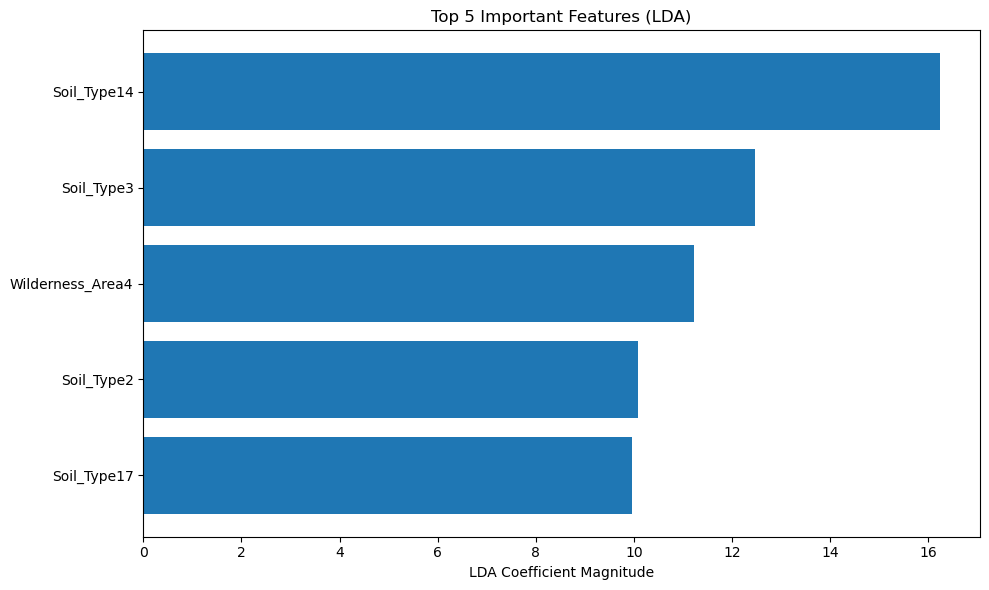

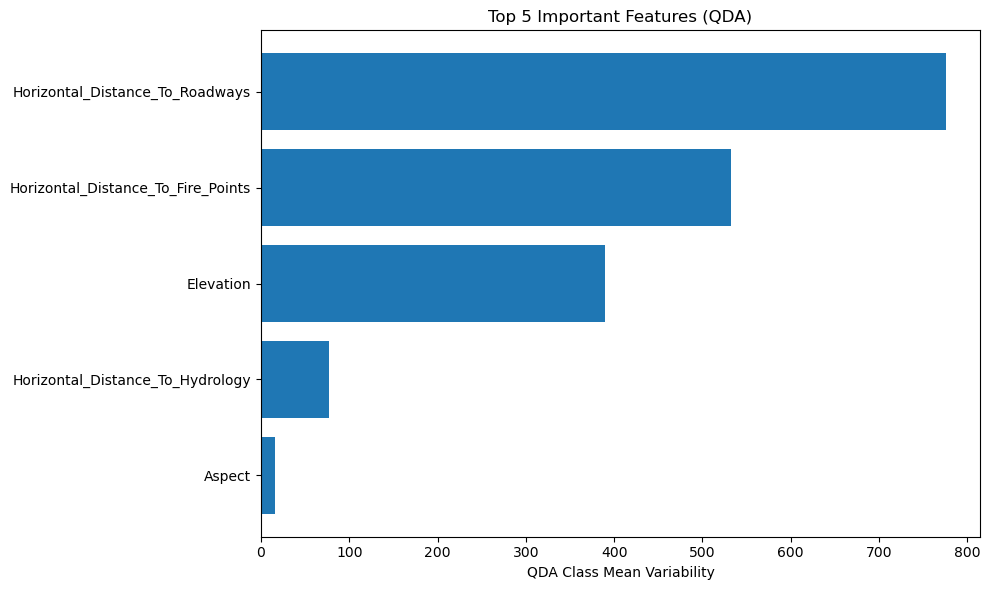

In [4]:
import matplotlib.pyplot as plt

feature_names = X.columns

#LDA Feature Importance
lda_importance = np.mean(np.abs(lda.coef_), axis=0)

lda_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lda_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(lda_importance_df['Feature'][:5][::-1], lda_importance_df['Importance'][:5][::-1])
plt.xlabel('LDA Coefficient Magnitude')
plt.title('Top 5 Important Features (LDA)')
plt.tight_layout()
plt.show()

#QDA Feature Importance
qda_class_means = np.array([qda.means_[i] for i in range(len(qda.means_))])
qda_importance = np.std(qda_class_means, axis=0)

qda_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': qda_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(qda_importance_df['Feature'][:5][::-1], qda_importance_df['Importance'][:5][::-1])
plt.xlabel('QDA Class Mean Variability')
plt.title('Top 5 Important Features (QDA)')
plt.tight_layout()
plt.show()
